In [2]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('punkt')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Epameinondas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data = pd.read_csv('data_cleaned_2021.csv')
data = data.rename(columns = {'Avg Salary(K)' : "Avg_Salary","Job Location" : "State","Lower Salary" : "Min_Salary","Upper Salary" : "Max_Salary"})
tokenizer = RegexpTokenizer(r"\w+")
data['Description_len'] = data['Job Description'].apply(lambda x: len(tokenizer.tokenize(x)))
data['Degree'] = data['Degree'].replace('na','B')

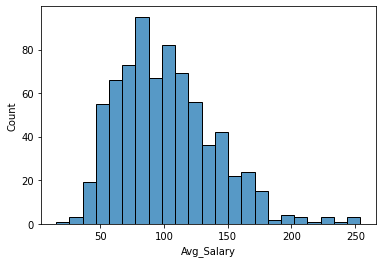

In [5]:
sns.histplot(data.Avg_Salary)
plt.show()

c:\Python3.9.5\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


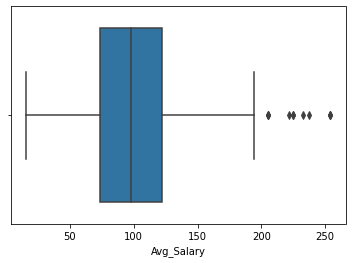

In [6]:
sns.boxplot(data.Avg_Salary)
plt.show()

In [7]:
#removing outliers
data = data[data['Avg_Salary'] < 190]
#Removing Incorrect inputs for Rating
data = data[data['Rating'] >= 0]

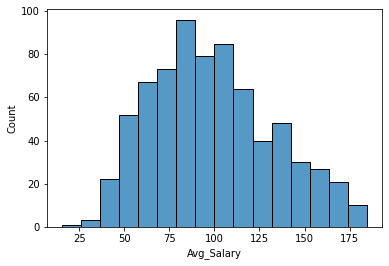

In [8]:
sns.histplot(data.Avg_Salary)
plt.show()

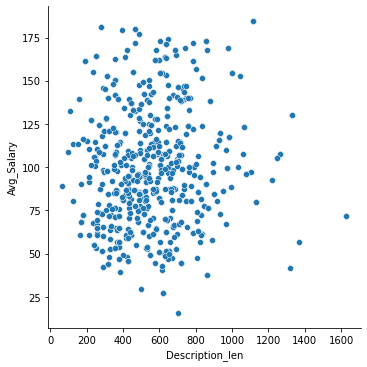

In [9]:
sns.relplot(data = data , x = 'Description_len', y = 'Avg_Salary')
plt.show()

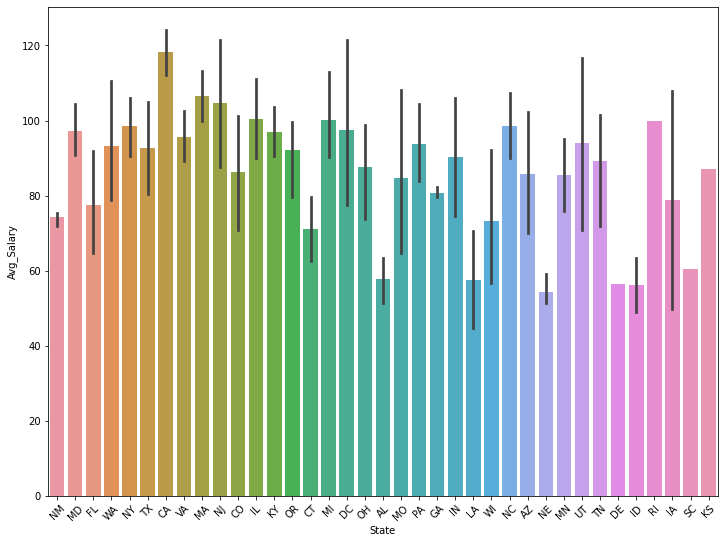

In [10]:
plt.figure(figsize = (12,9))
sns.barplot(data = data , x = 'State', y = 'Avg_Salary')
plt.xticks(rotation = 45)
plt.show()

<AxesSubplot:>

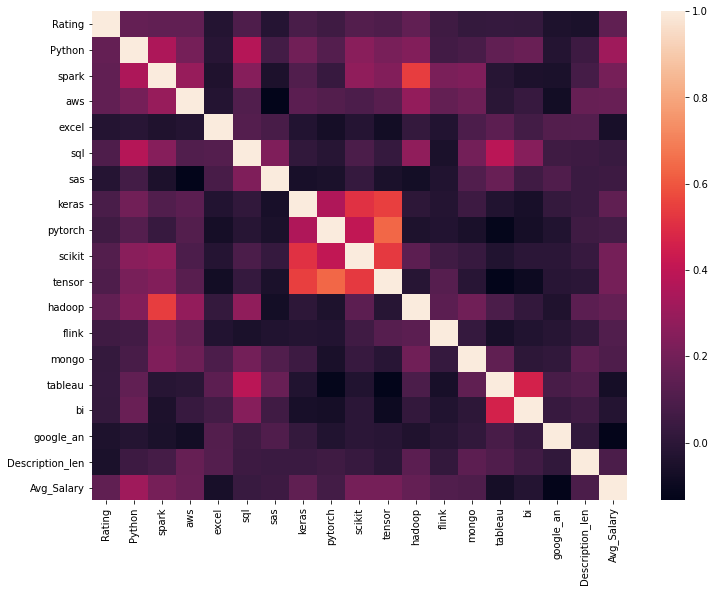

In [11]:
new_data = data[['Rating',
       'State','Python', 'spark', 'aws','excel', 'sql',
       'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop',
       'flink', 'mongo','Degree','tableau','bi','google_an','Description_len','Avg_Salary']]
plt.figure(figsize = (12,9))
sns.heatmap(new_data.corr())

In [12]:
features = new_data.drop(columns = ['Avg_Salary'],axis = 1)
target = data['Avg_Salary']

num_f = features._get_numeric_data()
cat_f = features.select_dtypes('object')

In [13]:
scaler = StandardScaler()
scaler.fit(num_f)
scaled_num = pd.DataFrame(scaler.transform(num_f),columns = num_f.columns).reset_index(drop=True)
scaled_cats = pd.get_dummies(cat_f).reset_index(drop=True)
features_scaled = pd.concat([scaled_cats,scaled_num],axis = 1)
features_scaled.shape

(718, 58)

In [14]:
pca = PCA(n_components = 23,whiten=True ,random_state = 23)
x_train,x_test,y_train,y_test = train_test_split(features_scaled,target , test_size = 0.2 , random_state = 23)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [15]:
xg = XGBRegressor(booster = 'gbtree',n_estimators=1000,max_depth=6,gamma = 0, eta=0.1, subsample=0.9, colsample_bytree=0.5,eval_metric =['mae'],random_state = 23)

In [16]:
model = xg.fit(x_train,y_train)
predictions = xg.predict(x_test)

In [17]:
mean = target.mean()  
mae = mean_absolute_error(predictions,y_test)
print(f"Mean Avg Salary: {round(new_data['Avg_Salary'].mean(),2)} "f"\nMean Absolute Error: {round(mae,2)}")

Mean Avg Salary: 98.83 
Mean Absolute Error: 5.87


In [18]:
error_ratio = round((1 -(mean - mae)/mean) * 100,2)
print(f"Prediction error ratio : {error_ratio}%")

Prediction error ratio : 5.94%
